In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from six.moves import cPickle as pickle
import collections
pd.set_option('display.max_columns', None)

/Library/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


# load data and check the basic stats

In [344]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y/%m/%d %H:%M:%S.%f')
columns = ["ticker","exchange","last_price","last_volume","time","reserve","timestamps","ask_price","ask_size","bid_price","bid_size","ask_price_level_2","ask_size_level_2","bid_price_level_2","bid_size_level_2","ask_price_level_3","ask_size_level_3","bid_price_level_3","bid_size_level_3","ask_price_level_4","ask_size_level_4","bid_price_level_4","bid_size_level_4","ask_price_level_5","ask_size_level_5","bid_price_level_5","bid_size_level_5","open_interest","trading_value","avg_price","buy_vol","sell_vol","property1","number1","property2","number2","high","low","daily_settlement_price","open"]
df = pd.read_csv('trading.csv', header =None, names = columns, parse_dates={'time_line': ['timestamps']}, date_parser=dateparse)

In [345]:
print(df.shape)
df.head()

(35548, 40)


,time_line,ticker,exchange,last_price,last_volume,time,reserve,ask_price,ask_size,bid_price,bid_size,ask_price_level_2,ask_size_level_2,bid_price_level_2,bid_size_level_2,ask_price_level_3,ask_size_level_3,bid_price_level_3,bid_size_level_3,ask_price_level_4,ask_size_level_4,bid_price_level_4,bid_size_level_4,ask_price_level_5,ask_size_level_5,bid_price_level_5,bid_size_level_5,open_interest,trading_value,avg_price,buy_vol,sell_vol,property1,number1,property2,number2,high,low,daily_settlement_price,open
0,2015-07-01 09:00:00.500,RB1510,4,2128.0,98,90000,0,2128.0,73,2127.0,763,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,2556422,2.972840e+10,21291.965599,0,0,0,0,0,0,2140.0,2121.0,0.0,2135.0
1,2015-07-01 09:00:01.000,RB1510,4,2128.0,1082,90001,0,2130.0,76,2128.0,22,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,2556138,2.975143e+10,21291.963232,0,0,0,0,0,0,2140.0,2121.0,0.0,2135.0
2,2015-07-01 09:00:01.500,RB1510,4,2131.0,390,90001,0,2130.0,20,2128.0,87,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,2556200,2.975973e+10,21291.963099,0,0,0,0,0,0,2140.0,2121.0,0.0,2135.0
3,2015-07-01 09:00:02.000,RB1510,4,2128.0,1052,90002,0,2128.0,63,2127.0,357,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,2556568,2.978211e+10,21291.948668,0,0,0,0,0,0,2140.0,2121.0,0.0,2135.0
4,2015-07-01 09:00:02.500,RB1510,4,2128.0,288,90002,0,2128.0,22,2127.0,368,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,2556700,2.978824e+10,21291.946209,0,0,0,0,0,0,2140.0,2121.0,0.0,2135.0


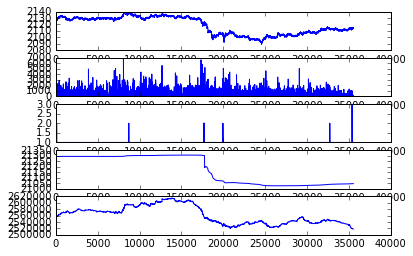

In [348]:
%matplotlib inline
plt.figure(1)
plt.subplot(5,1,1)
plt.plot(df.last_price)
plt.subplot(5,1,2)
plt.plot(df.last_volume)
plt.subplot(5,1,3)
plt.plot(df.avg_price)
plt.subplot(5,1,4)
plt.plot(df.open_interest)
plt.show()

In [349]:
##desciptive statisitcs 
df.describe()

,exchange,last_price,last_volume,time,reserve,ask_price,ask_size,bid_price,bid_size,ask_price_level_2,ask_size_level_2,bid_price_level_2,bid_size_level_2,ask_price_level_3,ask_size_level_3,bid_price_level_3,bid_size_level_3,ask_price_level_4,ask_size_level_4,bid_price_level_4,bid_size_level_4,ask_price_level_5,ask_size_level_5,bid_price_level_5,bid_size_level_5,open_interest,trading_value,avg_price,buy_vol,sell_vol,property1,number1,property2,number2,high,low,daily_settlement_price,open,spread,volume
count,35548.0,35548.000000,35548.000000,35548.000000,35548.0,35548.000000,35548.000000,35548.000000,35548.000000,35548.0,35548.0,35548.0,35548.0,35548.0,35548.0,35548.0,35548.0,35548.0,35548.0,35548.0,35548.0,35548.0,35548.0,35548.0,35548.0,3.554800e+04,3.554800e+04,35548.000000,35548.0,35548.0,35548.0,35548.0,35548.0,35548.0,35548.000000,35548.000000,35548.0,35548.000000,35548.000000,3.554800e+04
mean,4.0,2117.935439,124.565433,158429.052661,0.0,2118.428547,1377.275008,2117.428238,1318.539693,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.561591e+06,3.986761e+10,21172.442370,0.0,0.0,0.0,0.0,0.0,0.0,2131.492405,2106.043631,0.0,2127.494936,1.000309,1.879934e+06
std,0.0,13.525110,337.093562,64011.702685,0.0,13.511078,856.301787,13.511008,784.843281,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.754032e+04,1.770922e+10,127.932221,0.0,0.0,0.0,0.0,0.0,0.0,8.502092,15.315033,0.0,7.500104,0.019121,8.284349e+05
min,4.0,2089.000000,2.000000,0.000000,0.0,2090.000000,1.000000,2089.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.517700e+06,4.570720e+07,21024.932182,0.0,0.0,0.0,0.0,0.0,0.0,2120.000000,2089.000000,0.0,2120.000000,1.000000,2.156000e+03
25%,4.0,2105.000000,4.000000,110001.000000,0.0,2105.000000,778.000000,2104.000000,772.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.537070e+06,2.996784e+10,21039.527603,0.0,0.0,0.0,0.0,0.0,0.0,2123.000000,2089.000000,0.0,2120.000000,1.000000,1.416809e+06
50%,4.0,2120.000000,14.000000,144154.500000,0.0,2121.000000,1224.000000,2120.000000,1200.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.555622e+06,3.909365e+10,21199.516126,0.0,0.0,0.0,0.0,0.0,0.0,2123.000000,2117.000000,0.0,2120.000000,1.000000,1.848775e+06
75%,4.0,2130.000000,62.000000,220354.250000,0.0,2131.000000,1809.250000,2130.000000,1699.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.585090e+06,5.151428e+10,21299.686129,0.0,0.0,0.0,0.0,0.0,0.0,2140.000000,2121.000000,0.0,2135.000000,1.000000,2.418546e+06
max,4.0,2140.000000,6876.000000,235959.000000,0.0,2140.000000,8338.000000,2139.000000,5814.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.614638e+06,7.795705e+10,21305.311035,0.0,0.0,0.0,0.0,0.0,0.0,2140.000000,2121.000000,0.0,2135.000000,3.000000,3.659918e+06


In [350]:
#Based on statistics above, only a few columns will be useful later. Remove rest columns

In [351]:
columns = ["time_line", "last_price","last_volume","ask_price","ask_size","bid_price","bid_size","open_interest"]
df = df[columns]

In [352]:
df.head()

,time_line,last_price,last_volume,ask_price,ask_size,bid_price,bid_size,open_interest
0,2015-07-01 09:00:00.500,2128.0,98,2128.0,73,2127.0,763,2556422
1,2015-07-01 09:00:01.000,2128.0,1082,2130.0,76,2128.0,22,2556138
2,2015-07-01 09:00:01.500,2131.0,390,2130.0,20,2128.0,87,2556200
3,2015-07-01 09:00:02.000,2128.0,1052,2128.0,63,2127.0,357,2556568
4,2015-07-01 09:00:02.500,2128.0,288,2128.0,22,2127.0,368,2556700
5,2015-07-01 09:00:03.000,2129.0,116,2129.0,67,2128.0,188,2556760
6,2015-07-01 09:00:03.500,2128.0,296,2129.0,11,2128.0,284,2557018
7,2015-07-01 09:00:04.000,2130.0,160,2131.0,1125,2130.0,226,2557044
8,2015-07-01 09:00:04.500,2130.0,1078,2130.0,327,2129.0,28,2557796
9,2015-07-01 09:00:05.000,2129.0,304,2130.0,373,2129.0,100,2558046


In [12]:
pickle_file = 'data.pickle'
try:
  f = open(pickle_file, 'wb')
  save = {
    'df': df
    }
  pickle.dump(save, f, pickle.HIGHEST_PROTOCOL)
  f.close()
except Exception as e:
  print('Unable to save data to', pickle_file, ':', e)
  raise

In [2]:
pickle_file = 'data.pickle'

with open(pickle_file, 'rb') as f:
  save = pickle.load(f)
  df = save['df']
  del save  # hint to help gc free up memory
  print('dataset', df.shape)

('dataset', (35548, 8))


# Features engieering

In [105]:
##this function is used to calcualte the ratio between current value and previous nth value 
def compute_n_bin_return(data, columnName, n):
    newColName =  columnName + '_' + str(n)+'_bin_change'
    data[newColName] = 0
    data[newColName][n:] = np.log(data[columnName][n:]/data[columnName][:-n].values)
    return data

In [674]:
newDf = df.copy()
newDf['mid_price'] = (newDf['ask_price'] + newDf['bid_price'])/2
newDf = compute_n_bin_return(newDf, 'mid_price', 1)
newDf = compute_n_bin_return(newDf, 'mid_price', 5)
newDf = compute_n_bin_return(newDf, 'mid_price', 10)
newDf['size_imbalance'] = np.log(newDf['ask_size']/newDf['bid_size'])
newDf['ask_size_to_volume'] = np.log(newDf['ask_size']/newDf['last_volume'])
newDf['bid_size_to_volume'] = np.log(newDf['bid_size']/newDf['last_volume'])
newDf = compute_n_bin_return(newDf, 'open_interest', 1)
newDf = compute_n_bin_return(newDf, 'open_interest', 5)
newDf = compute_n_bin_return(newDf, 'open_interest', 10)
newDf = compute_n_bin_return(newDf, 'last_volume', 1)
newDf = compute_n_bin_return(newDf, 'last_volume', 5)
newDf = compute_n_bin_return(newDf, 'last_volume', 10)
newDf = compute_n_bin_return(newDf, 'bid_size', 1)
newDf = compute_n_bin_return(newDf, 'bid_size', 5)
newDf = compute_n_bin_return(newDf, 'bid_size', 10)
newDf = compute_n_bin_return(newDf, 'ask_size', 1)
newDf = compute_n_bin_return(newDf, 'ask_size', 5)
newDf = compute_n_bin_return(newDf, 'ask_size', 10)
windows = 10
newDf['rolling_mean'] = pd.rolling_mean(newDf['mid_price'], windows)
newDf['rolling_std'] = pd.rolling_std(newDf['mid_price'], windows)
newDf['rolling_upperband'] = newDf['rolling_mean'] + newDf['rolling_std']
newDf['rolling_lowerband'] = newDf['rolling_mean'] - newDf['rolling_std']
newDf['break_upperband'] = np.where(newDf.mid_price > newDf.rolling_upperband, 1, 0)
newDf['break_lowerband'] = np.where(newDf.mid_price < newDf.rolling_lowerband, 1, 0)
newDf['rolling_bid_size_mean'] = pd.rolling_mean(newDf['bid_size'], windows)
newDf['rolling_ask_size_mean'] = pd.rolling_mean(newDf['ask_size'], windows)
newDf['bid_size_to_rolling_mean'] = np.log(newDf['bid_size']/newDf['rolling_bid_size_mean'])
newDf['ask_size_to_rolling_mean'] = np.log(newDf['ask_size']/newDf['rolling_ask_size_mean'])
newDf['rolling_size_imbalance'] = np.log(newDf['rolling_ask_size_mean']/newDf['rolling_bid_size_mean'])

newDf['direction'] = 0 
newDf['direction'][:-1] = np.where(newDf['mid_price'][:-1] > newDf['mid_price'][1:].values, -1, 
                                   np.where(newDf['mid_price'][:-1] == newDf['mid_price'][1:].values, 0, 1))


/Library/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:22: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).mean()
/Library/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:23: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).std()
/Library/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:28: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).mean()
/Library/anaconda/lib/pytho

In [676]:
def findNextPriceMovement(data, window, columnName):
    rowNum = data.shape[0]
    l = list(data[columnName].values)
    newL = []
    lastIndex = 0
    for index, element in enumerate(l):
        if(index >= rowNum - window):
            newL.append(1)
            continue

        nextMovement = 1
        for i in range(max(index, lastIndex), index+window):
            if(l[i] == 0):
                continue
            else:
                nextMovement = l[i]
                lastIndex = i
                break
        newL.append(nextMovement)
        
    return newL

In [677]:
## find first price movement direction in next 400 bins, if doesn't find, list as 0 
## 0 = flat; 1 = up; -1 = down 
l = findNextPriceMovement(newDf, 400, 'direction')
newDf['nextMovement'] = l

In [678]:
collections.Counter(newDf['nextMovement'].values)

Counter({-1: 18147, 1: 17401})

In [679]:
##remove top 10 and bottom 400 data 
newDf = newDf.ix[9:newDf.shape[0]-400]

In [680]:
print(newDf.isnull().any())
newDf.head()

time_line                      False
last_price                     False
last_volume                    False
ask_price                      False
ask_size                       False
bid_price                      False
bid_size                       False
open_interest                  False
mid_price                      False
mid_price_1_bin_change         False
mid_price_5_bin_change         False
mid_price_10_bin_change        False
size_imbalance                 False
ask_size_to_volume             False
bid_size_to_volume             False
open_interest_1_bin_change     False
open_interest_5_bin_change     False
open_interest_10_bin_change    False
last_volume_1_bin_change       False
last_volume_5_bin_change       False
last_volume_10_bin_change      False
bid_size_1_bin_change          False
bid_size_5_bin_change          False
bid_size_10_bin_change         False
ask_size_1_bin_change          False
ask_size_5_bin_change          False
ask_size_10_bin_change         False
r

,time_line,last_price,last_volume,ask_price,ask_size,bid_price,bid_size,open_interest,mid_price,mid_price_1_bin_change,mid_price_5_bin_change,mid_price_10_bin_change,size_imbalance,open_interest_1_bin_change,open_interest_5_bin_change,open_interest_10_bin_change,bid_size_1_bin_change,bid_size_5_bin_change,bid_size_10_bin_change,ask_size_1_bin_change,ask_size_5_bin_change,ask_size_10_bin_change,rolling_mean,rolling_std,rolling_upperband,rolling_lowerband,break_upperband,break_lowerband,rolling_bid_size_mean,rolling_ask_size_mean,bid_size_to_rolling_mean,ask_size_to_rolling_mean,rolling_size_imbalance,direction,nextMovement
9,2015-07-01 09:00:05.000,2129.0,304,2130.0,373,2129.0,100,2558046,2129.5,0.000000,0.000940,0.000000,1.316408,9.773562e-05,0.000526,0.000000,1.272966,-1.302913,0.000000,0.131618,2.830536,0.000000,2128.70,1.005540,2130.711080,2126.688920,0,0,242.3,215.7,-0.885006,0.547690,-0.116288,0,1
10,2015-07-01 09:00:05.500,2130.0,288,2130.0,229,2129.0,481,2558048,2129.5,0.000000,0.000470,0.000940,-0.742145,7.818465e-07,0.000504,0.000636,1.570697,0.939425,-0.461391,-0.487856,1.229029,1.143263,2128.90,0.936898,2130.773796,2127.026204,0,0,214.1,231.3,0.809424,-0.009994,0.077272,1,1
11,2015-07-01 09:00:06.000,2130.0,660,2131.0,900,2130.0,307,2558194,2130.5,0.000469,0.000939,0.000704,1.075547,5.707314e-05,0.000460,0.000804,-0.449020,0.077874,2.635805,1.368673,4.404499,2.471661,2129.05,1.065885,2131.181770,2126.918230,0,0,242.6,313.7,0.235434,1.053958,0.257023,0,-1
12,2015-07-01 09:00:06.500,2130.0,70,2131.0,898,2130.0,553,2558192,2130.5,0.000000,0.000000,0.000704,0.484812,-7.818018e-07,0.000449,0.000779,0.588510,0.894823,1.849450,-0.002225,-0.225368,3.804438,2129.20,1.159502,2131.519004,2126.880996,0,0,289.2,401.5,0.648240,0.804963,0.328089,0,-1
13,2015-07-01 09:00:07.000,2130.0,146,2131.0,875,2130.0,525,2558170,2130.5,0.000000,0.000469,0.001409,0.510826,-8.599861e-06,0.000146,0.000626,-0.051960,2.931194,0.385662,-0.025946,0.984264,2.631089,2129.50,1.054093,2131.608185,2127.391815,0,0,306.0,482.7,0.539813,0.594829,0.455810,0,-1


# Build the model to predict next movement 

In [486]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.grid_search import GridSearchCV
from sklearn import cross_validation, metrics 
from scipy.stats import randint
from operator import itemgetter
from sklearn.cross_validation import KFold
from sklearn.grid_search import GridSearchCV

In [571]:
def split_data(data, val_size=0.1, test_size=0.1):
    """
    splits data to training, validation and testing parts
    """
    ntest = int(round(len(data) * (1 - test_size)))
    nval = int(round(len(data.iloc[:ntest]) * (1 - val_size)))

    df_train, df_val, df_test = data.iloc[:nval], data.iloc[nval:ntest], data.iloc[ntest:]

    return df_train, df_val, df_test


In [681]:
df_train, df_val, df_test = split_data(newDf, 0, 0.4)

In [682]:
predictors_col = ['mid_price_1_bin_change', 'mid_price_5_bin_change',
'mid_price_10_bin_change', 'last_volume_1_bin_change', 'last_volume_5_bin_change', 'last_volume_10_bin_change',
'ask_size_to_volume', 'bid_size_to_volume', 'size_imbalance','open_interest_1_bin_change', 'open_interest_5_bin_change',
'open_interest_10_bin_change', 'bid_size_1_bin_change','bid_size_5_bin_change', 'bid_size_10_bin_change',
'ask_size_1_bin_change', 'ask_size_5_bin_change', 'ask_size_10_bin_change', 
'bid_size_to_rolling_mean', 'ask_size_to_rolling_mean','rolling_size_imbalance']
label_col = []

In [683]:
x= df_train[predictors_col]
y =df_train['nextMovement']
x_test= df_test[predictors_col]
y_test= df_test['nextMovement']

In [684]:
params = {'n_estimators': 700, 'max_depth': 2, 'min_samples_split': 2, 'learning_rate': 0.01, 'loss': 'deviance'}
gbm0 = GradientBoostingClassifier(**params)

gbm0.fit(x, y)

GradientBoostingClassifier(init=None, learning_rate=0.01, loss='deviance',
              max_depth=2, max_features=None, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=400,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [713]:
## training dataset use 0.7 and 0.3 as the threshold to predict if the price is up and down 
y_pred = gbm0.predict(x)
print('Confuse matrix that use 0.5 as cutoff:')
print(metrics.confusion_matrix(y, y_pred, labels= [1,  -1]))
print('training data accurary', metrics.accuracy_score(y, y_pred))
predprob = gbm0.predict_proba(x)[:,1]
y_pred_new = [ 1 if i >= 0.7 else -1 if i <= 0.3 else 0  for i in predprob]
print('Confuse matrix that use 0.7 and 0.3 as cutoff:')
print(metrics.confusion_matrix(y, y_pred_new, labels= [1,  -1]))

Confuse matrix that use 0.5 as cutoff:
[[5880 3853]
 [2816 8535]]
('training data accurary', 0.68369379624359705)
Confuse matrix that use 0.7 and 0.3 as cutoff:
[[2340  783]
 [ 619 3891]]


In [718]:
y_pred = gbm0.predict(x_test)
metrics.accuracy_score(y_test, y_pred)

0.68155947638019354

In [719]:
predprob = gbm0.predict_proba(x_test)[:,1]
metrics.roc_auc_score(y_test, predprob)

0.75042979933401244

In [720]:
collections.Counter(y_test.values)

Counter({-1: 6793, 1: 7263})

In [721]:
###use differnt threshold to predict up or down signal 
y_pred_new = [ 1 if i >= 0.7 else -1 if i <= 0.3 else 0  for i in predprob]

In [722]:
## use orignal y prediciton 
metrics.confusion_matrix(y_test, y_pred, labels= [1,  -1])
##       prediciton  
##       1      0
##true 1 4394  2869
##     0 1607  5186

array([[4394, 2869],
       [1607, 5186]])

In [723]:
## use new y prediciton based on the new threshold, the accuracy increase a lot 
metrics.confusion_matrix(y_test, y_pred_new, labels= [1,  -1])

array([[1837,  731],
       [ 402, 2492]])

# Backtest

In [ ]:
##from the test data set, import one row a time, if it is a up signal, buy one contract at mid price
## if next bin, still a up signal, buy one more position (up to max) till there is a sell signal. Close all position 
## if it is a down signal with no position, short one contract; 
## if next bin, still a down signal, short one more positon (up to max) till there is a buy signal. Close all position

In [724]:
tradingCost = 0.0001
tonsPerContract = 10

def tradingSimulation(marketData, signal, maxPosLimit, initalCapital):
    cumReturn = []
    returnChange = []
    count, openPosition, openCost, totalCost, profit = 0, 0 , 0 , 0 , 0

    for index, row in df_test.iterrows():
        currentMidPrice = row['mid_price']
        buyOrSell = signal[count]

        if (openPosition == 0):
            openPosition = buyOrSell
            openCost = (-1) * currentMidPrice*buyOrSell * tonsPerContract
        elif ( openPosition * buyOrSell > 0 and abs(openPosition) < maxPosLimit):  ## the signal is the same as our position bet, long/short one more position
            openCost += (-1) * currentMidPrice*buyOrSell * tonsPerContract
            openPosition = openPosition + buyOrSell
        elif (openPosition * buyOrSell < 0):  ##signal is the opposite as our position, fill the position
            thisBinReturn = openCost + currentMidPrice*openPosition* tonsPerContract  - (abs(openCost) + abs(openPosition*currentMidPrice* tonsPerContract))* tradingCost
            totalCost = totalCost + (abs(openCost) + abs(openPosition*currentMidPrice* tonsPerContract))* tradingCost
            profitChange = 0 if profit == 0 else ((profit+thisBinReturn)/profit-1)
            returnChange.append(profitChange*100)
            profit = profit + thisBinReturn
            cumReturn.append(profit/initalCapital*100)
            openPosition= 0
            openCost = 0
        count = count + 1
    return cumReturn, returnChange, totalCost, profit

In [732]:
maxPositionHold = 1
contractValue = df_test['mid_price'].mean()*tonsPerContract
cumReturn, returnChange, totalCost, profit = tradingSimulation(df_test, y_pred_new, maxPositionHold, maxPositionHold*contractValue )

print('Profit is %f and trading cost is %f' %(profit, totalCost))

Profit is 2324.686000 and trading cost is 2475.314000


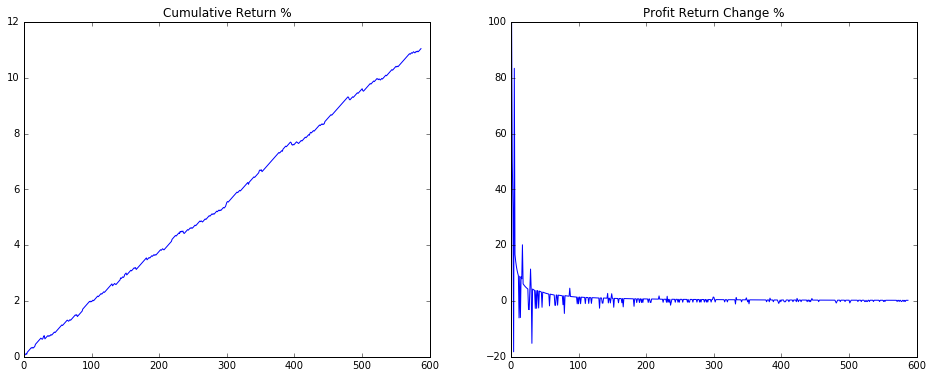

In [726]:
%matplotlib inline
fig, ax = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=False, figsize=(16, 6))
ax[0].plot(cumReturn)
ax[0].set_title('Cumulative Return %') 
ax[1].plot(returnChange)
ax[1].set_title('Profit Return Change %')